# Health Tech Analysis

Using SQL & Python for Data-Driven Healthcare Decisions
 
Scenario:
HealthTech Analytics is a health data startup working with hospitals to analyze patient and treatment data for improving care and operational efficiency.

In [1]:
pip install sqlite3 --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


## Requirements

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = sqlite3.connect('healthtech_analytics.db')

In [4]:
cursor = conn.cursor()

## 1. Data Setup and Exploration

Connect to the database using Python.

Write a query to list the number of patients by city.

Display results using a bar chart (using matplotlib or seaborn).

In [5]:
#Getting the numbe of patients

cursor.execute('SELECT count(*) FROM patients')
result = cursor.fetchone()
print(f"Total number of patients: {result[0]}")

Total number of patients: 50


In [6]:
#Getting the number of patients in each city

cursor.execute('SELECT city, count(*) FROM patients GROUP BY city;')
results = cursor.fetchall()
results
#results.sort(key=lambda x: x[1], reverse=True)
#print("Number of patients in each city:")
for row in results:
    print(f"City: {row[0]}, Count: {row[1]}")
data = pd.DataFrame(results, columns=['City', 'Count'])


City: Cape Town, Count: 10
City: Durban, Count: 10
City: Johannesburg, Count: 11
City: Port Elizabeth, Count: 11
City: Pretoria, Count: 8


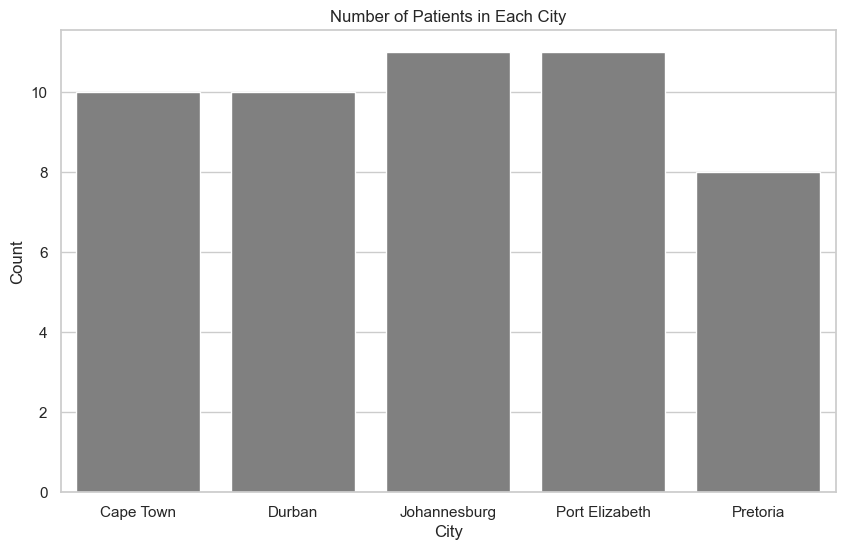

In [7]:
#Plotting the number of patients in each city

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x='City', y='Count', data=data, color='grey')
plt.title('Number of Patients in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


## 2. Diagnosis Trends by Department

In [8]:
cursor.execute('SELECT * FROM diagnoses')
diagnoses = cursor.fetchall()
pd.DataFrame(diagnoses)

,0,1
0,D001,Hypertension
1,D002,Diabetes
2,D003,Fracture
3,D004,Migraine
4,D005,Flu


### 1. Write an SQL query to calculate how many diagnoses are made per department.

In [12]:
cursor.execute('SELECT count(*) FROM diagnoses;')
results = cursor.fetchone()
print(f'There are {results[0]} diagnoses in the database')

There are 6 diagnoses in the database


In [26]:
cursor.execute('SELECT * FROM diagnoses JOIN visits ON visits.diagnosis_code = diagnoses.diagnosis_code;')
results = cursor.fetchall()
results

[('D004', 'Migraine', 1, 47, '2025-02-09', 10, 'D004'),
 ('D004', 'Migraine', 2, 23, '2024-04-17', 2, 'D004'),
 ('D004', 'Migraine', 3, 38, '2024-11-22', 10, 'D004'),
 ('D005', 'Flu', 4, 50, '2024-04-14', 1, 'D005'),
 ('D004', 'Migraine', 5, 37, '2024-06-08', 8, 'D004'),
 ('D001', 'Hypertension', 6, 31, '2024-12-24', 10, 'D001'),
 ('D003', 'Fracture', 7, 34, '2025-02-06', 1, 'D003'),
 ('D004', 'Migraine', 8, 32, '2024-12-18', 9, 'D004'),
 ('D005', 'Flu', 9, 7, '2024-03-21', 3, 'D005'),
 ('D001', 'Hypertension', 10, 6, '2024-05-29', 8, 'D001'),
 ('D004', 'Migraine', 11, 4, '2025-01-29', 8, 'D004'),
 ('D003', 'Fracture', 12, 17, '2024-08-29', 1, 'D003'),
 ('D003', 'Fracture', 13, 14, '2025-01-24', 4, 'D003'),
 ('D005', 'Flu', 14, 17, '2024-10-22', 4, 'D005'),
 ('D004', 'Migraine', 15, 6, '2024-10-21', 10, 'D004'),
 ('D005', 'Flu', 16, 15, '2025-03-10', 7, 'D005'),
 ('D004', 'Migraine', 17, 37, '2025-02-12', 9, 'D004'),
 ('D004', 'Migraine', 18, 34, '2025-02-10', 3, 'D004'),
 ('D001', 'Hy

In [ ]:
pd.DataFrame(results, columns= [])

,0,1,2,3,4,5,6
0,D004,Migraine,1,47,2025-02-09,10,D004
1,D004,Migraine,2,23,2024-04-17,2,D004
2,D004,Migraine,3,38,2024-11-22,10,D004
3,D005,Flu,4,50,2024-04-14,1,D005
4,D004,Migraine,5,37,2024-06-08,8,D004
...,...,...,...,...,...,...,...
195,D002,Diabetes,196,44,2024-06-04,7,D002
196,D004,Migraine,197,18,2024-09-10,5,D004
197,D002,Diabetes,198,18,2024-05-29,2,D002
198,D002,Diabetes,199,31,2024-06-07,4,D002


### 2. Write a SQL query to calculate how many diagnoses are made per department.

In [10]:
cursor.execute('SELECT * FROM visits, doctors FULL JOIN diagnoses ON visits.doctor_id = doctors.doctor_id;')
results = cursor.fetchall()
results
#cursor.execute('SELECT * FROM visits;')


[(1, 47, '2025-02-09', 10, 'D004', 1, 'Doctor_1', 'Neurology', None, None),
 (1, 47, '2025-02-09', 10, 'D004', 2, 'Doctor_2', 'Pediatrics', None, None),
 (1,
  47,
  '2025-02-09',
  10,
  'D004',
  3,
  'Doctor_3',
  'General Medicine',
  None,
  None),
 (1,
  47,
  '2025-02-09',
  10,
  'D004',
  4,
  'Doctor_4',
  'General Medicine',
  None,
  None),
 (1, 47, '2025-02-09', 10, 'D004', 5, 'Doctor_5', 'Pediatrics', None, None),
 (1, 47, '2025-02-09', 10, 'D004', 6, 'Doctor_6', 'Cardiology', None, None),
 (1, 47, '2025-02-09', 10, 'D004', 7, 'Doctor_7', 'Cardiology', None, None),
 (1, 47, '2025-02-09', 10, 'D004', 8, 'Doctor_8', 'Pediatrics', None, None),
 (1, 47, '2025-02-09', 10, 'D004', 9, 'Doctor_9', 'Pediatrics', None, None),
 (1,
  47,
  '2025-02-09',
  10,
  'D004',
  10,
  'Doctor_10',
  'Pediatrics',
  'D001',
  'Hypertension'),
 (1,
  47,
  '2025-02-09',
  10,
  'D004',
  10,
  'Doctor_10',
  'Pediatrics',
  'D002',
  'Diabetes'),
 (1,
  47,
  '2025-02-09',
  10,
  'D004',
  1

### 3. Join the necessary tables (visits, doctors, and diagnoses) and present the results in a table.

In [11]:
results = pd.DataFrame(results, columns=['Visit_id', 'Patient_id', 'Visit_date', 'Doctor_id_1', 'Diagnoses_code', 'Doctor_id', "Doctor_name", "Department", "4", "Diagnoses_description"])
results.drop(columns=['Doctor_id_1', '4'], inplace=True)
results

,Visit_id,Patient_id,Visit_date,Diagnoses_code,Doctor_id,Doctor_name,Department,Diagnoses_description
0,1,47,2025-02-09,D004,1,Doctor_1,Neurology,None
1,1,47,2025-02-09,D004,2,Doctor_2,Pediatrics,None
2,1,47,2025-02-09,D004,3,Doctor_3,General Medicine,None
3,1,47,2025-02-09,D004,4,Doctor_4,General Medicine,None
4,1,47,2025-02-09,D004,5,Doctor_5,Pediatrics,None
...,...,...,...,...,...,...,...,...
2795,200,43,2024-04-03,D003,10,Doctor_10,Pediatrics,Hypertension
2796,200,43,2024-04-03,D003,10,Doctor_10,Pediatrics,Diabetes
2797,200,43,2024-04-03,D003,10,Doctor_10,Pediatrics,Fracture
2798,200,43,2024-04-03,D003,10,Doctor_10,Pediatrics,Migraine


### 4.Interpret the results briefly in Markdown.

From the merged data we can see that 

## Doctors

In [8]:
cursor.execute('SELECT * FROM doctors')
doctors = cursor.fetchall()
pd.DataFrame(doctors)

,0,1,2
0,1,Doctor_1,Neurology
1,2,Doctor_2,Pediatrics
2,3,Doctor_3,General Medicine
3,4,Doctor_4,General Medicine
4,5,Doctor_5,Pediatrics
5,6,Doctor_6,Cardiology
6,7,Doctor_7,Cardiology
7,8,Doctor_8,Pediatrics
8,9,Doctor_9,Pediatrics
9,10,Doctor_10,Pediatrics


## Patients

In [9]:
cursor.execute('SELECT * FROM patients')
patients = cursor.fetchall()
pd.DataFrame(patients)

,0,1,2,3,4
0,1,Patient_1,Male,1990-08-26,Cape Town
1,2,Patient_2,Male,1994-06-30,Pretoria
2,3,Patient_3,Female,1974-06-23,Cape Town
3,4,Patient_4,Female,1985-10-06,Port Elizabeth
4,5,Patient_5,Female,1998-06-23,Johannesburg
5,6,Patient_6,Female,1990-01-20,Port Elizabeth
6,7,Patient_7,Male,1986-01-23,Cape Town
7,8,Patient_8,Male,1987-03-25,Johannesburg
8,9,Patient_9,Male,1990-04-05,Pretoria
9,10,Patient_10,Female,2004-03-01,Durban


## Treatments

In [10]:
cursor.execute('SELECT * FROM treatments')
treatments = cursor.fetchall()
pd.DataFrame(treatments)

,0,1,2,3
0,1,37,MRI,135.51
1,2,170,X-ray,1008.35
2,3,67,X-ray,1535.76
3,4,51,MRI,900.66
4,5,142,Blood Test,1660.26
...,...,...,...,...
295,296,11,Surgery,767.95
296,297,122,MRI,633.79
297,298,74,Surgery,129.95
298,299,80,MRI,730.53


## Visits

In [11]:
cursor.execute('SELECT * FROM visits')
visits = cursor.fetchall()
pd.DataFrame(visits)

,0,1,2,3,4
0,1,47,2025-02-09,10,D004
1,2,23,2024-04-17,2,D004
2,3,38,2024-11-22,10,D004
3,4,50,2024-04-14,1,D005
4,5,37,2024-06-08,8,D004
...,...,...,...,...,...
195,196,44,2024-06-04,7,D002
196,197,18,2024-09-10,5,D004
197,198,18,2024-05-29,2,D002
198,199,31,2024-06-07,4,D002


cursor.execute('SELECT * FROM patients')
patients = cursor.fetchall()
pd.DataFrame(patients)

In [ ]:
cursor.execute('SELECT * FROM patients')
patients = cursor.fetchall()
pd.DataFrame(patients)